In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import sqlite3

from rubin_sim.utils import approx_ra_dec2_alt_az, Site


In [2]:
con = sqlite3.connect('twi_neo_amm2.5_riz_v3.1_10yrs.db')
obs = pd.read_sql('select observationId,altitude,azimuth,solarElong,visitExposureTime,observationStartMJD,sunAlt from observations;', con)
con.close()

In [3]:
obs

,observationId,altitude,azimuth,solarElong,visitExposureTime,observationStartMJD,sunAlt
0,0,76.932475,24.226278,113.482915,30.0,60677.034611,-12.164211
1,1,75.269725,12.153061,113.261929,30.0,60677.035086,-12.283342
2,2,76.031418,0.149759,110.616357,30.0,60677.035567,-12.403675
3,3,73.157668,2.650180,112.911654,30.0,60677.036017,-12.515862
4,4,70.763003,355.707095,112.425621,30.0,60677.036467,-12.628195
...,...,...,...,...,...,...,...
2107608,2107608,71.199018,332.743491,118.795081,30.0,64329.362059,-12.621699
2107609,2107609,68.144348,335.166922,120.809866,30.0,64329.362509,-12.508737
2107610,2107610,68.978732,326.547733,121.471985,30.0,64329.362966,-12.393761
2107611,2107611,72.184332,312.630417,119.545571,30.0,64329.363464,-12.268286


In [4]:
vat = pd.read_csv('twi_neo_amm2.5_riz_v3.1_10yrs__granvik_pha_5k_obs.txt', comment='#', sep=' ')

In [5]:
vat

,obj_id,time,ra,dec,dradt,ddecdt,phase,solarelon,helio_dist,geo_dist,...,observationStartMJD,rotSkyPos,seeingFwhmEff,seeingFwhmGeom,solarElong,visitExposureTime,dmag_color,dmag_trail,dmag_detect,Unnamed: 27
0,0,61191.951179,128.864170,25.004714,0.209044,-0.083989,13.476964,54.993802,3.563463,4.046944,...,61191.951179,180.321422,1.486144,1.273610,56.051073,15.0,-0.457036,0.004456,0.002779,NaN
1,0,61191.954275,128.864885,25.004454,0.209083,-0.084013,13.476579,54.991544,3.563468,4.046989,...,61191.954275,181.238104,1.705788,1.454158,56.048133,15.0,-0.457036,0.003472,0.002134,NaN
2,0,61191.957371,128.865599,25.004194,0.209124,-0.084037,13.476193,54.989286,3.563474,4.047033,...,61191.957371,182.140403,1.437254,1.233422,56.045194,15.0,-0.457036,0.004736,0.002965,NaN
3,0,61191.960465,128.866313,25.003934,0.209165,-0.084060,13.475808,54.987029,3.563480,4.047078,...,61191.960465,183.028313,1.327507,1.143211,56.042255,15.0,-0.457036,0.005461,0.003451,NaN
4,0,61460.305310,169.216803,10.393473,-0.229914,0.083209,3.304301,167.851386,3.612694,2.639287,...,61460.305310,285.026773,0.992322,0.867689,169.328171,30.0,-0.457036,0.035204,0.027548,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560352,4999,64326.167891,100.382453,20.328169,-0.249120,-0.013330,0.773201,176.753200,4.125583,3.143398,...,64326.167891,127.491257,1.406602,1.208227,175.777248,30.0,0.389483,0.020769,0.014969,NaN
1560353,4999,64327.239505,100.101731,20.313465,-0.249822,-0.014178,0.670432,177.187019,4.121808,3.139341,...,64327.239505,148.020880,1.200539,1.038843,177.033470,30.0,-0.457036,0.027058,0.020267,NaN
1560354,4999,64327.263199,100.095421,20.313126,-0.249633,-0.014388,0.669744,177.189989,4.121725,3.139257,...,64327.263199,148.020880,1.180808,1.022624,177.042612,30.0,-0.399899,0.027757,0.020874,NaN
1560355,4999,64329.222187,99.581361,20.285807,-0.250712,-0.014390,0.851320,176.434418,4.114785,3.132881,...,64329.222187,142.507750,0.960181,0.841269,176.264034,30.0,0.389483,0.038709,0.030818,NaN


In [6]:
site = Site(name='LSST')
alt, az = approx_ra_dec2_alt_az(vat['ra'].values, vat['dec'].values, site._latitude_deg, site._longitude_deg, vat['observationStartMJD'].values)

In [ ]:

#plt.plot(vat['ra'], vat['dec'], 'ko', alpha=.1)
#plt.xlabel('RA')
#plt.ylabel('dec')

Text(0.5, 0, 'az')

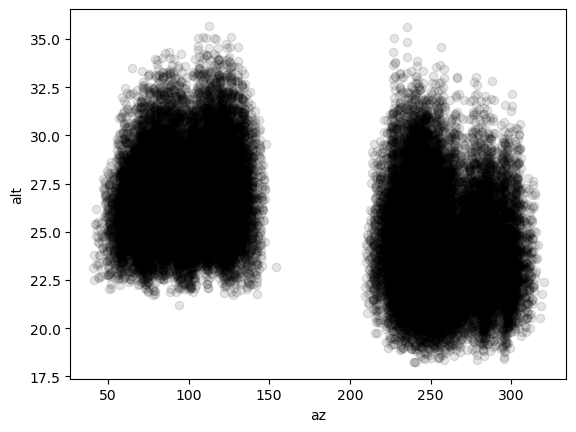

In [8]:
#plt.plot(az, alt, 'ko', alpha=.1)
#plt.ylabel('alt')
#plt.xlabel('az')

Text(0.5, 0, 'az')

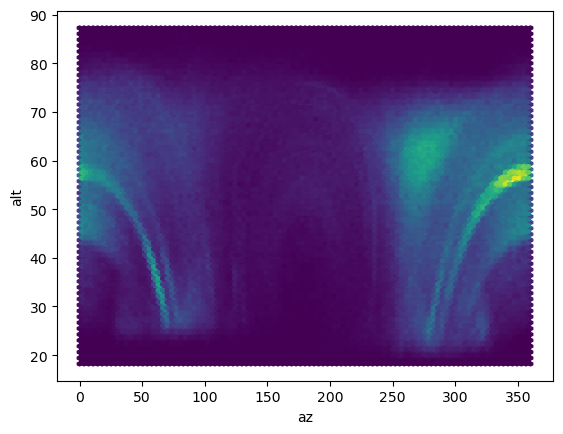

In [10]:
plt.hexbin(az, alt)
plt.ylabel('alt')
plt.xlabel('az')

Text(0.5, 0, 'dec')

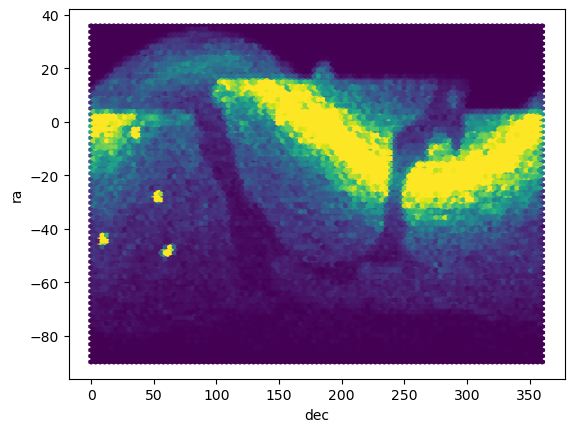

In [14]:
plt.hexbin(vat['ra'], vat['dec'], vmax=500)
plt.ylabel('ra')
plt.xlabel('dec')

Text(0.5, 0, 'az')

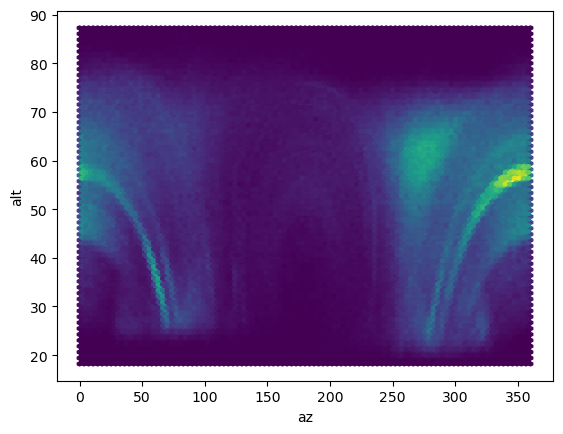

In [15]:
plt.hexbin(az, alt)
plt.ylabel('alt')
plt.xlabel('az')

Text(0.5, 0, 'az')

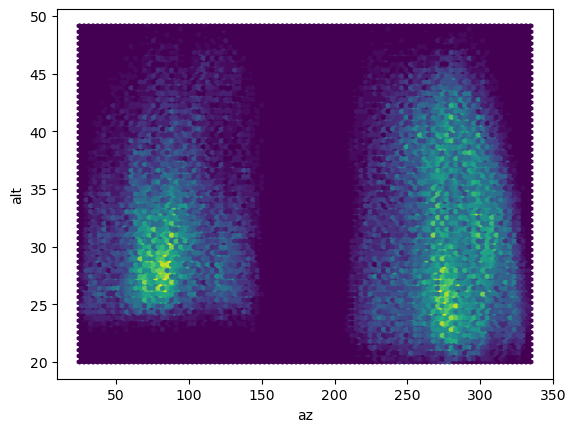

In [16]:
short = np.where(obs['visitExposureTime'] < 20)
plt.hexbin(obs['azimuth'].values[short], obs["altitude"].values[short])
plt.ylabel('alt')
plt.xlabel('az')

Text(0.5, 0, 'Solar Elongation (deg)')

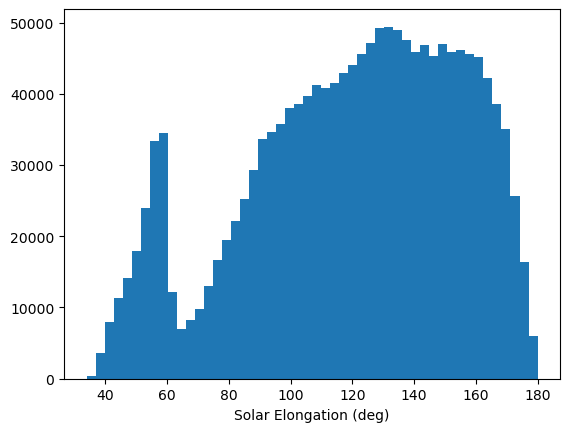

In [17]:
_temp = plt.hist(vat['solarelon'], bins=50)
plt.xlabel('Solar Elongation (deg)')

Text(0.5, 0, 'Solar Elongation (deg)')

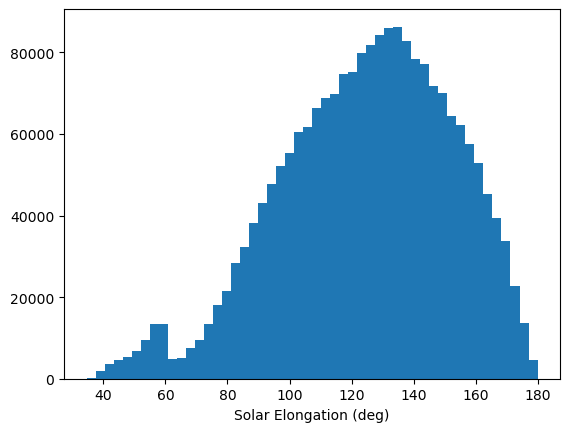

In [20]:
_temp = plt.hist(obs['solarElong'], bins=50)
plt.xlabel('Solar Elongation (deg)')

Text(0, 0.5, '#')

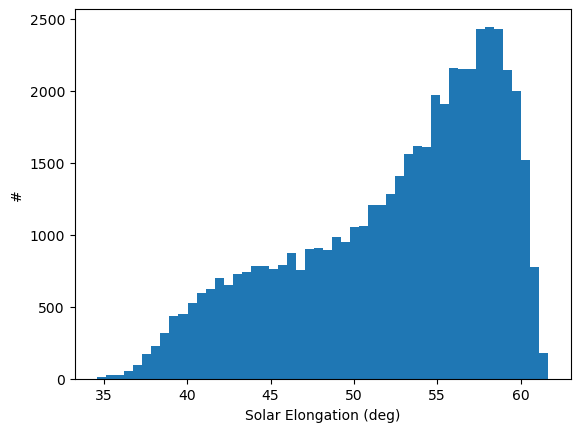

In [18]:
_tmp = plt.hist(obs['solarElong'].values[np.where(obs["visitExposureTime"] < 20.)], bins=50)
plt.xlabel('Solar Elongation (deg)')
plt.ylabel('#')

In [13]:
# looks like we should not bother with observations that have solar elongation > 50. 
# Yet, that's where most of the observations are going!  
# Also shows up as it's not worth it to go above altitude of 35 deg. 

In [14]:
vat.columns

Index(['obj_id', 'time', 'ra', 'dec', 'dradt', 'ddecdt', 'phase', 'solarelon',
       'helio_dist', 'geo_dist', 'magV', 'trueAnomaly', 'velocity', 'fieldDec',
       'fieldRA', 'filter', 'fiveSigmaDepth', 'night', 'observationStartMJD',
       'rotSkyPos', 'seeingFwhmEff', 'seeingFwhmGeom', 'solarElong',
       'visitExposureTime', 'dmag_color', 'dmag_trail', 'dmag_detect',
       'Unnamed: 27'],
      dtype='object')

In [15]:
#_tmp, com1, com2 = np.intersect1d(np.round(vat['observationStartMJD'].values*1000),
#                      np.round(obs['observationStartMJD']*1000), return_indices=True, assume_unique=False)

In [16]:
# ugh, this is a horrible loop, why not just have the observation id in the output!??!
indx = []
for mjd in vat['observationStartMJD'].values:
    indx.append(np.where(np.round(obs['observationStartMJD'].values*100000) == np.round(mjd*100000))[0])

In [17]:
indx = np.concatenate(indx)

In [18]:
indx

array([1062419, 1892728, 1892741, ..., 1896124, 1896137, 1896150])

In [19]:
obs['observationStartMJD'].values[indx]

array([62468.02240793, 63952.04315506, 63952.04625774, ...,
       63956.35217377, 63956.35530296, 63956.3584321 ])

In [20]:
vat['observationStartMJD'].values

array([62468.02240793, 63952.04315506, 63952.04625774, ...,
       63956.35217377, 63956.35530296, 63956.3584321 ])

Text(0.5, 0, 'Sun Alt (deg)')

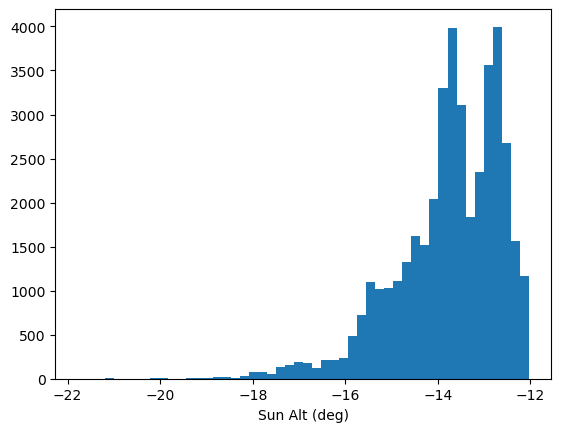

In [21]:
_tmp = plt.hist(obs['sunAlt'].values[indx], bins=50)
plt.xlabel('Sun Alt (deg)')

In [11]:
help(plt.hexbin)

Help on function hexbin in module matplotlib.pyplot:

hexbin(x, y, C=None, gridsize=100, bins=None, xscale='linear', yscale='linear', extent=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors='face', reduce_C_function=<function mean at 0x105f5d6c0>, mincnt=None, marginals=False, *, data=None, **kwargs)
    Make a 2D hexagonal binning plot of points *x*, *y*.
    
    If *C* is *None*, the value of the hexagon is determined by the number
    of points in the hexagon. Otherwise, *C* specifies values at the
    coordinate (x[i], y[i]). For each hexagon, these values are reduced
    using *reduce_C_function*.
    
    Parameters
    ----------
    x, y : array-like
        The data positions. *x* and *y* must be of the same length.
    
    C : array-like, optional
        If given, these values are accumulated in the bins. Otherwise,
        every point has a value of 1. Must be of the same length as *x*
        and *y*.
    
    gridsize : int or (i